# Word Distributions and Word Cloud

In [1]:
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
import os
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibubalo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibubalo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibubalo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_pickle(r"C:\Users\ibubalo\Documents\WAI_GitHub\WaiLearn-September-NLP\df_captions_preprocessed1.pkl")

In [3]:
df.head(20)

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name,lstm_input
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795,"[startseq, two, young, guys, with, shaggy, hai..."
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795,"[startseq, two, young, white, males, are, outs..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795,"[startseq, two, men, in, green, shirts, are, s..."
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795,"[startseq, man, in, blue, shirt, standing, in,..."
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795,"[startseq, two, friends, enjoy, time, spent, t..."
5,10002456.jpg,0,Several men in hard hats are operating a gian...,"[several, men, in, hard, hats, are, operating,...",10002456,"[startseq, several, men, in, hard, hats, are, ..."
6,10002456.jpg,1,Workers look down from up above on a piece of...,"[workers, look, down, from, up, above, on, pie...",10002456,"[startseq, workers, look, down, from, up, abov..."
7,10002456.jpg,2,Two men working on a machine wearing hard hats .,"[two, men, working, on, machine, wearing, hard...",10002456,"[startseq, two, men, working, on, machine, wea..."
8,10002456.jpg,3,Four men on top of a tall structure .,"[four, men, on, top, of, tall, structure]",10002456,"[startseq, four, men, on, top, of, tall, struc..."
9,10002456.jpg,4,Three men on a large rig .,"[three, men, on, large, rig]",10002456,"[startseq, three, men, on, large, rig, endseq]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158915 entries, 0 to 158914
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   image_name          158915 non-null  object
 1   comment_number      158915 non-null  int64 
 2   comment             158915 non-null  object
 3   tokenized_captions  158915 non-null  object
 4   cleaned_image_name  158915 non-null  object
 5   lstm_input          158915 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.3+ MB


In [5]:
#words = word_tokenize(str(df['tokenized_captions']))
#print(words)
#print("\n")
#print(len(words))

In [6]:
print(str(df['tokenized_captions']))

0         [two, young, guys, with, shaggy, hair, look, a...
1         [two, young, white, males, are, outside, near,...
2         [two, men, in, green, shirts, are, standing, i...
3              [man, in, blue, shirt, standing, in, garden]
4              [two, friends, enjoy, time, spent, together]
                                ...                        
158910    [man, in, shorts, and, hawaiian, shirt, leans,...
158911    [young, man, hanging, over, the, side, of, boa...
158912    [man, is, leaning, off, of, the, side, of, blu...
158913    [man, riding, small, boat, in, harbor, with, f...
158914    [man, on, moored, blue, and, white, boat, with...
Name: tokenized_captions, Length: 158915, dtype: object


In [7]:
df['tokenized_captions'].tolist()
#create an empty list
#put everything inside a list, then write a for loop to concatenate all into one


[['two',
  'young',
  'guys',
  'with',
  'shaggy',
  'hair',
  'look',
  'at',
  'their',
  'hands',
  'while',
  'hanging',
  'out',
  'in',
  'the',
  'yard'],
 ['two',
  'young',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes'],
 ['two', 'men', 'in', 'green', 'shirts', 'are', 'standing', 'in', 'yard'],
 ['man', 'in', 'blue', 'shirt', 'standing', 'in', 'garden'],
 ['two', 'friends', 'enjoy', 'time', 'spent', 'together'],
 ['several',
  'men',
  'in',
  'hard',
  'hats',
  'are',
  'operating',
  'giant',
  'pulley',
  'system'],
 ['workers',
  'look',
  'down',
  'from',
  'up',
  'above',
  'on',
  'piece',
  'of',
  'equipment'],
 ['two', 'men', 'working', 'on', 'machine', 'wearing', 'hard', 'hats'],
 ['four', 'men', 'on', 'top', 'of', 'tall', 'structure'],
 ['three', 'men', 'on', 'large', 'rig'],
 ['child',
  'in',
  'pink',
  'dress',
  'is',
  'climbing',
  'up',
  'set',
  'of',
  'stairs',
  'in',
  'an',
  'entry',
  'way'],
 ['little', 'girl', 'in

In [8]:
type(df['tokenized_captions'][0])
#concatenate everything into a list

list

In [9]:
words = []
for each_list in df['tokenized_captions'][:1000]:
    words += each_list

print(words)




['two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', 'two', 'young', 'white', 'males', 'are', 'outside', 'near', 'many', 'bushes', 'two', 'men', 'in', 'green', 'shirts', 'are', 'standing', 'in', 'yard', 'man', 'in', 'blue', 'shirt', 'standing', 'in', 'garden', 'two', 'friends', 'enjoy', 'time', 'spent', 'together', 'several', 'men', 'in', 'hard', 'hats', 'are', 'operating', 'giant', 'pulley', 'system', 'workers', 'look', 'down', 'from', 'up', 'above', 'on', 'piece', 'of', 'equipment', 'two', 'men', 'working', 'on', 'machine', 'wearing', 'hard', 'hats', 'four', 'men', 'on', 'top', 'of', 'tall', 'structure', 'three', 'men', 'on', 'large', 'rig', 'child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way', 'little', 'girl', 'in', 'pink', 'dress', 'going', 'into', 'wooden', 'cabin', 'little', 'girl', 'climbing', 'the', 'stairs', 'to', 'her', 'playhouse', 'little', 'gi

In [10]:
#Frequency distribution and 50 most common words
fdist = FreqDist(words)
fdist.most_common(50)

[('in', 569),
 ('the', 396),
 ('on', 322),
 ('man', 319),
 ('and', 272),
 ('of', 258),
 ('is', 241),
 ('with', 239),
 ('two', 139),
 ('are', 127),
 ('at', 115),
 ('to', 113),
 ('woman', 101),
 ('an', 91),
 ('people', 91),
 ('shirt', 89),
 ('wearing', 89),
 ('black', 88),
 ('sitting', 87),
 ('white', 84),
 ('young', 83),
 ('dog', 83),
 ('while', 80),
 ('his', 77),
 ('red', 73),
 ('boy', 72),
 ('men', 71),
 ('blue', 67),
 ('front', 67),
 ('girl', 62),
 ('street', 62),
 ('standing', 58),
 ('playing', 53),
 ('green', 46),
 ('group', 45),
 ('little', 41),
 ('her', 41),
 ('outside', 37),
 ('water', 37),
 ('over', 35),
 ('three', 34),
 ('one', 34),
 ('walking', 34),
 ('by', 34),
 ('person', 34),
 ('down', 33),
 ('from', 33),
 ('child', 32),
 ('next', 32),
 ('through', 31)]

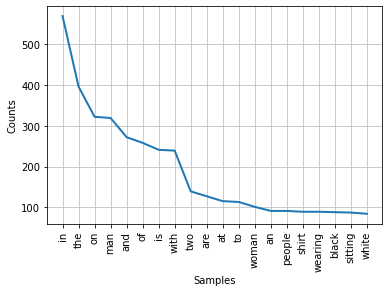

In [11]:
#plot frequency distribution
fdist.plot(20)

In [12]:
#removing punctuation plot
words_no_punct = []
for w in words:
  if w.isalpha():
    words_no_punct.append(w.lower())
print(words_no_punct)

['two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'at', 'their', 'hands', 'while', 'hanging', 'out', 'in', 'the', 'yard', 'two', 'young', 'white', 'males', 'are', 'outside', 'near', 'many', 'bushes', 'two', 'men', 'in', 'green', 'shirts', 'are', 'standing', 'in', 'yard', 'man', 'in', 'blue', 'shirt', 'standing', 'in', 'garden', 'two', 'friends', 'enjoy', 'time', 'spent', 'together', 'several', 'men', 'in', 'hard', 'hats', 'are', 'operating', 'giant', 'pulley', 'system', 'workers', 'look', 'down', 'from', 'up', 'above', 'on', 'piece', 'of', 'equipment', 'two', 'men', 'working', 'on', 'machine', 'wearing', 'hard', 'hats', 'four', 'men', 'on', 'top', 'of', 'tall', 'structure', 'three', 'men', 'on', 'large', 'rig', 'child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way', 'little', 'girl', 'in', 'pink', 'dress', 'going', 'into', 'wooden', 'cabin', 'little', 'girl', 'climbing', 'the', 'stairs', 'to', 'her', 'playhouse', 'little', 'gi

In [13]:
fdist = FreqDist(words_no_punct)
fdist.most_common(100)

[('in', 569),
 ('the', 396),
 ('on', 322),
 ('man', 319),
 ('and', 272),
 ('of', 258),
 ('is', 241),
 ('with', 239),
 ('two', 139),
 ('are', 127),
 ('at', 115),
 ('to', 113),
 ('woman', 101),
 ('an', 91),
 ('people', 91),
 ('shirt', 89),
 ('wearing', 89),
 ('black', 88),
 ('sitting', 87),
 ('white', 84),
 ('young', 83),
 ('dog', 83),
 ('while', 80),
 ('his', 77),
 ('red', 73),
 ('boy', 72),
 ('men', 71),
 ('blue', 67),
 ('front', 67),
 ('girl', 62),
 ('street', 62),
 ('standing', 58),
 ('playing', 53),
 ('green', 46),
 ('group', 45),
 ('little', 41),
 ('her', 41),
 ('outside', 37),
 ('water', 37),
 ('over', 35),
 ('three', 34),
 ('one', 34),
 ('walking', 34),
 ('by', 34),
 ('person', 34),
 ('down', 33),
 ('from', 33),
 ('child', 32),
 ('next', 32),
 ('through', 31),
 ('snow', 31),
 ('near', 30),
 ('large', 30),
 ('hat', 30),
 ('holding', 30),
 ('stands', 30),
 ('women', 30),
 ('for', 30),
 ('yellow', 30),
 ('their', 29),
 ('looking', 29),
 ('beach', 28),
 ('up', 26),
 ('jacket', 26),
 

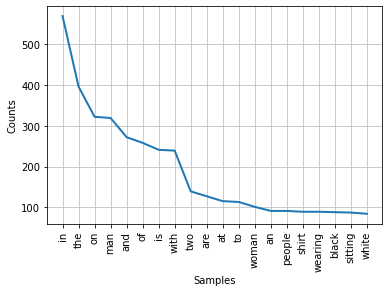

In [14]:
#plot frequency distribution
fdist.plot(20)

In [15]:
#find stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
#print(stopwords)

In [16]:
#removing stopwords
words_no_sw = []
for w in words_no_punct:
  if w not in stopwords:
    words_no_sw.append(w.lower())

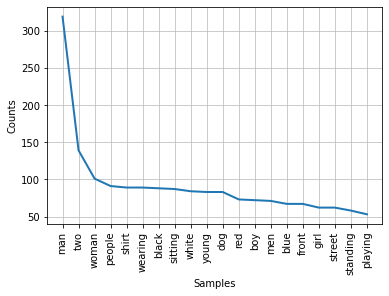

In [17]:
#final frequency
fdist = FreqDist(words_no_sw)
fdist.plot(20)

# Word Cloud 

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

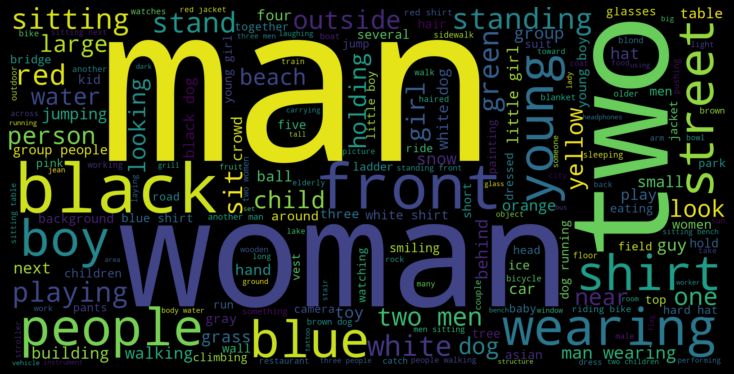

In [19]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black').generate(" ".join(words_no_sw))
#Dsplaying words
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()